In [6]:
from algobot.BackTester import EMABackTester

In [7]:
tester = EMABackTester("KRW-BTC", count=730)

In [8]:
tester.test_strategy()

(1.674071, 0.047104)

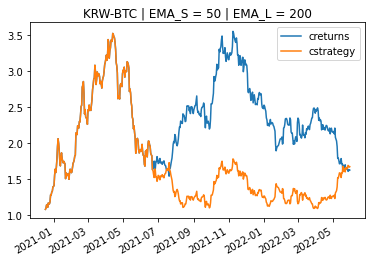

In [9]:
tester.plot_returns()

In [13]:
tester.optimize_parameters((20,50,1), (30,100,1))

(array([24., 41.]), 12.849947)

In [14]:
tester.set_parameters(24, 41)

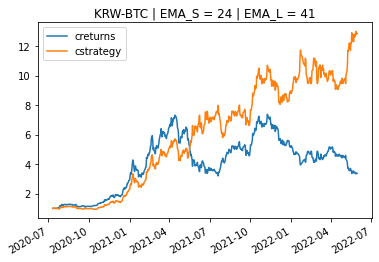

In [15]:
tester.plot_returns()

In [4]:
from algobot.BackTester import CrossSmaEmaBackTester

In [6]:
tester = CrossSmaEmaBackTester("KRW-BTC", count=73000, interval="minute10")

In [7]:
tester.test_strategy()

(0.059244, -0.861685)

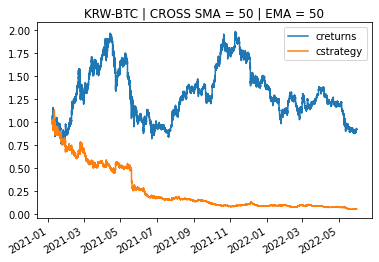

In [8]:
tester.plot_returns()

In [9]:
tester.optimize_parameters([(20,100,1)])

(97.0, 1.440397)

In [10]:
tester.update_and_run(97)

-1.440397

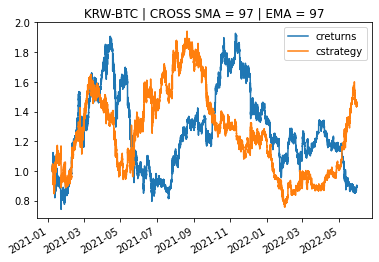

In [11]:
tester.plot_returns()

<AxesSubplot:>

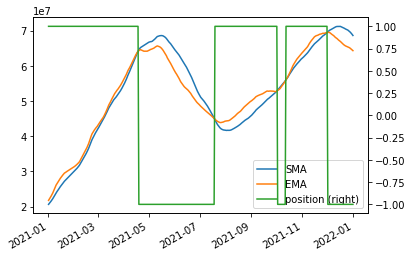

In [25]:
tester.results.loc["2021",["SMA","EMA","position"]].plot(secondary_y="position")